### Simple Recommender System for new anime file

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#loading the dataset
anime_data = pd.read_csv(r'C:\Users\JADESOLA\Documents\AI\MadeWithML\Recommendation system\datasets\Anime_new_cleaned.csv')

In [3]:
#viewing the data
anime_data.head(3)

,anime_id,title,genres,synopsis,anime_type,producer,studio,rating,scored_by,popularity,members,num_of_episodes,anime_source,aired,Link
0,1,Cowboy Bebop,"['Action','Adventure','Comedy','Drama','SciFi'...","In the year 2071, humanity has colonized sever...",TV,['BandaiVisual'],Sunrise,8.81,363889.0,39.0,704490.0,26.0,Original,"Apr 3, 1998 to Apr 24, 1999",https://myanimelist.net/anime/1/Cowboy_Bebop
1,5,Cowboy Bebop Tengoku no Tobira,"['Action','Space','Drama','Mystery','SciFi']","Another day, another bountysuch is the life of...",Movie,"['Sunrise','BandaiVisual']",Bones,8.41,111187.0,475.0,179899.0,1.0,Original,"Sep 1, 2001",https://myanimelist.net/anime/5/Cowboy_Bebop__...
2,6,Trigun,"['Action','SciFi','Adventure','Comedy','Drama'...","Vash the Stampede is the man with a 60,000,000...",TV,['VictorEntertainment'],Madhouse,8.31,197451.0,158.0,372709.0,26.0,Manga,"Apr 1, 1998 to Sep 30, 1998",https://myanimelist.net/anime/6/Trigun


## The features of the dataset are as follows: 
#### -Anime_id : anime Id (as per myanimelist.net)
#### -Title : name of anime
#### -Genre : Main genre
#### -Synopsis : Brief Discription
#### -Rating : Rating of anime as per myanimelist.net/
#### -ScoredBy : Total number of users who scored the given anime
#### -Popularity : Rank of anime based on popularity
#### -Members : Number of members added given anime on their list
#### -Episodes : Number of episodes

In [4]:
anime_data.shape

(15832, 15)

### Removing the camel-casing of the column names

In [5]:
anime_data.columns = map(str.lower, anime_data.columns)
anime_data.head()

,anime_id,title,genres,synopsis,anime_type,producer,studio,rating,scored_by,popularity,members,num_of_episodes,anime_source,aired,link
0,1,Cowboy Bebop,"['Action','Adventure','Comedy','Drama','SciFi'...","In the year 2071, humanity has colonized sever...",TV,['BandaiVisual'],Sunrise,8.81,363889.0,39.0,704490.0,26.0,Original,"Apr 3, 1998 to Apr 24, 1999",https://myanimelist.net/anime/1/Cowboy_Bebop
1,5,Cowboy Bebop Tengoku no Tobira,"['Action','Space','Drama','Mystery','SciFi']","Another day, another bountysuch is the life of...",Movie,"['Sunrise','BandaiVisual']",Bones,8.41,111187.0,475.0,179899.0,1.0,Original,"Sep 1, 2001",https://myanimelist.net/anime/5/Cowboy_Bebop__...
2,6,Trigun,"['Action','SciFi','Adventure','Comedy','Drama'...","Vash the Stampede is the man with a 60,000,000...",TV,['VictorEntertainment'],Madhouse,8.31,197451.0,158.0,372709.0,26.0,Manga,"Apr 1, 1998 to Sep 30, 1998",https://myanimelist.net/anime/6/Trigun
3,7,Witch Hunter Robin,"['Action','Magic','Police','Supernatural','Dra...",Witches are individuals with special powers li...,TV,['BandaiVisual'],Sunrise,7.34,31875.0,1278.0,74889.0,26.0,Original,"Jul 2, 2002 to Dec 24, 2002",https://myanimelist.net/anime/7/Witch_Hunter_R...
4,8,Bouken Ou Beet,"['Adventure','Fantasy','Shounen','Supernatural']",It is the dark century and the people are suff...,TV,['nan'],Toei Animation,7.04,4757.0,3968.0,11247.0,52.0,Manga,"Sep 30, 2004 to Sep 29, 2005",https://myanimelist.net/anime/8/Bouken_Ou_Beet


In [6]:
#checking the datatype of each column
anime_data.dtypes

anime_id             int64
title               object
genres              object
synopsis            object
anime_type          object
producer            object
studio              object
rating             float64
scored_by          float64
popularity         float64
members            float64
num_of_episodes    float64
anime_source        object
aired               object
link                object
dtype: object

## Some columns like rating, scoredby, popularity, members, episodes need to be typecasted as integers. We'll convert them once we clean all the data.

In [7]:
#creating the function to remove the characters
import re
def clean_up(s):
    return re.sub(r"[^\sa-zA-Z0-9\.\,\;\!\-]","",str(s))

In [8]:
anime_data['title'] = anime_data['title'].apply(clean_up)
anime_data['genres'] = anime_data['genres'].apply(clean_up)
anime_data['producer'] = anime_data['producer'].apply(clean_up)
anime_data['studio'] = anime_data['studio'].apply(clean_up)

In [9]:
#viewing the cleaned data
anime_data.head()

,anime_id,title,genres,synopsis,anime_type,producer,studio,rating,scored_by,popularity,members,num_of_episodes,anime_source,aired,link
0,1,Cowboy Bebop,"Action,Adventure,Comedy,Drama,SciFi,Space","In the year 2071, humanity has colonized sever...",TV,BandaiVisual,Sunrise,8.81,363889.0,39.0,704490.0,26.0,Original,"Apr 3, 1998 to Apr 24, 1999",https://myanimelist.net/anime/1/Cowboy_Bebop
1,5,Cowboy Bebop Tengoku no Tobira,"Action,Space,Drama,Mystery,SciFi","Another day, another bountysuch is the life of...",Movie,"Sunrise,BandaiVisual",Bones,8.41,111187.0,475.0,179899.0,1.0,Original,"Sep 1, 2001",https://myanimelist.net/anime/5/Cowboy_Bebop__...
2,6,Trigun,"Action,SciFi,Adventure,Comedy,Drama,Shounen","Vash the Stampede is the man with a 60,000,000...",TV,VictorEntertainment,Madhouse,8.31,197451.0,158.0,372709.0,26.0,Manga,"Apr 1, 1998 to Sep 30, 1998",https://myanimelist.net/anime/6/Trigun
3,7,Witch Hunter Robin,"Action,Magic,Police,Supernatural,Drama,Mystery",Witches are individuals with special powers li...,TV,BandaiVisual,Sunrise,7.34,31875.0,1278.0,74889.0,26.0,Original,"Jul 2, 2002 to Dec 24, 2002",https://myanimelist.net/anime/7/Witch_Hunter_R...
4,8,Bouken Ou Beet,"Adventure,Fantasy,Shounen,Supernatural",It is the dark century and the people are suff...,TV,nan,Toei Animation,7.04,4757.0,3968.0,11247.0,52.0,Manga,"Sep 30, 2004 to Sep 29, 2005",https://myanimelist.net/anime/8/Bouken_Ou_Beet


### For the Weighted Score Recommendation System we only need a few columns from the above dataset

In [10]:
#accessing a limited number of columns required for weighted score recommendation
anime_data = anime_data[['title','genres','rating','scored_by','members']]
anime_data

,title,genres,rating,scored_by,members
0,Cowboy Bebop,"Action,Adventure,Comedy,Drama,SciFi,Space",8.81,363889.0,704490.0
1,Cowboy Bebop Tengoku no Tobira,"Action,Space,Drama,Mystery,SciFi",8.41,111187.0,179899.0
2,Trigun,"Action,SciFi,Adventure,Comedy,Drama,Shounen",8.31,197451.0,372709.0
3,Witch Hunter Robin,"Action,Magic,Police,Supernatural,Drama,Mystery",7.34,31875.0,74889.0
4,Bouken Ou Beet,"Adventure,Fantasy,Shounen,Supernatural",7.04,4757.0,11247.0
5,Eyeshield 21,"Action,Sports,Comedy,Shounen",8.05,48765.0,106468.0
6,Hachimitsu to Clover,"Comedy,Drama,Josei,Romance,SliceofLife",8.14,54367.0,160236.0
7,Hungry Heart Wild Striker,"SliceofLife,Comedy,Sports,Shounen",7.69,8868.0,16132.0
8,Initial D Fourth Stage,"Action,Cars,Sports,Drama,Seinen",8.24,37575.0,64338.0
9,Monster,"Drama,Horror,Mystery,Police,Psychological,Sein...",8.69,118553.0,352153.0


In [11]:
#checking for null values
anime_data.isnull().sum()

title           0
genres          0
rating       2501
scored_by    3700
members         0
dtype: int64

In [12]:
anime_data.shape

(15832, 5)

### Using a delimiter for 'members' to be greater than 500 members

In [13]:
anime_data =  anime_data[anime_data['members']>=1000]
anime_data

,title,genres,rating,scored_by,members
0,Cowboy Bebop,"Action,Adventure,Comedy,Drama,SciFi,Space",8.81,363889.0,704490.0
1,Cowboy Bebop Tengoku no Tobira,"Action,Space,Drama,Mystery,SciFi",8.41,111187.0,179899.0
2,Trigun,"Action,SciFi,Adventure,Comedy,Drama,Shounen",8.31,197451.0,372709.0
3,Witch Hunter Robin,"Action,Magic,Police,Supernatural,Drama,Mystery",7.34,31875.0,74889.0
4,Bouken Ou Beet,"Adventure,Fantasy,Shounen,Supernatural",7.04,4757.0,11247.0
5,Eyeshield 21,"Action,Sports,Comedy,Shounen",8.05,48765.0,106468.0
6,Hachimitsu to Clover,"Comedy,Drama,Josei,Romance,SliceofLife",8.14,54367.0,160236.0
7,Hungry Heart Wild Striker,"SliceofLife,Comedy,Sports,Shounen",7.69,8868.0,16132.0
8,Initial D Fourth Stage,"Action,Cars,Sports,Drama,Seinen",8.24,37575.0,64338.0
9,Monster,"Drama,Horror,Mystery,Police,Psychological,Sein...",8.69,118553.0,352153.0


### Let's drop all the rows with NaN's. They will not help us with predicting

In [14]:
anime_data = anime_data.dropna(axis=0)
anime_data

,title,genres,rating,scored_by,members
0,Cowboy Bebop,"Action,Adventure,Comedy,Drama,SciFi,Space",8.81,363889.0,704490.0
1,Cowboy Bebop Tengoku no Tobira,"Action,Space,Drama,Mystery,SciFi",8.41,111187.0,179899.0
2,Trigun,"Action,SciFi,Adventure,Comedy,Drama,Shounen",8.31,197451.0,372709.0
3,Witch Hunter Robin,"Action,Magic,Police,Supernatural,Drama,Mystery",7.34,31875.0,74889.0
4,Bouken Ou Beet,"Adventure,Fantasy,Shounen,Supernatural",7.04,4757.0,11247.0
5,Eyeshield 21,"Action,Sports,Comedy,Shounen",8.05,48765.0,106468.0
6,Hachimitsu to Clover,"Comedy,Drama,Josei,Romance,SliceofLife",8.14,54367.0,160236.0
7,Hungry Heart Wild Striker,"SliceofLife,Comedy,Sports,Shounen",7.69,8868.0,16132.0
8,Initial D Fourth Stage,"Action,Cars,Sports,Drama,Seinen",8.24,37575.0,64338.0
9,Monster,"Drama,Horror,Mystery,Police,Psychological,Sein...",8.69,118553.0,352153.0


In [15]:
anime_data.shape

(6415, 5)

## 'rating' , 'scoredby' , 'members' and 'episodes' need to be integers.

In [16]:
anime_data = anime_data.astype({'scored_by':'int64','members':'int64'})
anime_data

,title,genres,rating,scored_by,members
0,Cowboy Bebop,"Action,Adventure,Comedy,Drama,SciFi,Space",8.81,363889,704490
1,Cowboy Bebop Tengoku no Tobira,"Action,Space,Drama,Mystery,SciFi",8.41,111187,179899
2,Trigun,"Action,SciFi,Adventure,Comedy,Drama,Shounen",8.31,197451,372709
3,Witch Hunter Robin,"Action,Magic,Police,Supernatural,Drama,Mystery",7.34,31875,74889
4,Bouken Ou Beet,"Adventure,Fantasy,Shounen,Supernatural",7.04,4757,11247
5,Eyeshield 21,"Action,Sports,Comedy,Shounen",8.05,48765,106468
6,Hachimitsu to Clover,"Comedy,Drama,Josei,Romance,SliceofLife",8.14,54367,160236
7,Hungry Heart Wild Striker,"SliceofLife,Comedy,Sports,Shounen",7.69,8868,16132
8,Initial D Fourth Stage,"Action,Cars,Sports,Drama,Seinen",8.24,37575,64338
9,Monster,"Drama,Horror,Mystery,Police,Psychological,Sein...",8.69,118553,352153


In [17]:
#checking out the number of unique animes
anime_data['title'].nunique()

6346

In [18]:
anime_data = anime_data.drop_duplicates()
anime_data= anime_data.reset_index()
anime_data = anime_data.drop(columns='index')
anime_data

,title,genres,rating,scored_by,members
0,Cowboy Bebop,"Action,Adventure,Comedy,Drama,SciFi,Space",8.81,363889,704490
1,Cowboy Bebop Tengoku no Tobira,"Action,Space,Drama,Mystery,SciFi",8.41,111187,179899
2,Trigun,"Action,SciFi,Adventure,Comedy,Drama,Shounen",8.31,197451,372709
3,Witch Hunter Robin,"Action,Magic,Police,Supernatural,Drama,Mystery",7.34,31875,74889
4,Bouken Ou Beet,"Adventure,Fantasy,Shounen,Supernatural",7.04,4757,11247
5,Eyeshield 21,"Action,Sports,Comedy,Shounen",8.05,48765,106468
6,Hachimitsu to Clover,"Comedy,Drama,Josei,Romance,SliceofLife",8.14,54367,160236
7,Hungry Heart Wild Striker,"SliceofLife,Comedy,Sports,Shounen",7.69,8868,16132
8,Initial D Fourth Stage,"Action,Cars,Sports,Drama,Seinen",8.24,37575,64338
9,Monster,"Drama,Horror,Mystery,Police,Psychological,Sein...",8.69,118553,352153


# A recommender system that recommends the highest rated anime to a user

Using the Weighted Average Formula AND the members column based on popularity
WR = (RV + Cm/V+m) where:
- V is the number of votes
- m is minimum votes required to be listed
- R is rating average of the anime
- C is mean vote across whole report

In [19]:
#finding the weighted average for each anime
V = anime_data['scored_by']                       #number of votes for each anime
R = anime_data['rating']                     #average voting rating for each anime
C = anime_data['rating'].mean()              #mean vote across the whole report
m = anime_data['scored_by'].quantile(0.80)        #minimum votes requires to be among the top 

anime_data['weighted_avg'] = ((R*V)+(C*m))/(V+m)     #used by imdb to calculate weighted average of movies

In [20]:
anime_data.head()

,title,genres,rating,scored_by,members,weighted_avg
0,Cowboy Bebop,"Action,Adventure,Comedy,Drama,SciFi,Space",8.81,363889,704490,8.690471
1,Cowboy Bebop Tengoku no Tobira,"Action,Space,Drama,Mystery,SciFi",8.41,111187,179899,8.141510
2,Trigun,"Action,SciFi,Adventure,Comedy,Drama,Shounen",8.31,197451,372709,8.156876
3,Witch Hunter Robin,"Action,Magic,Police,Supernatural,Drama,Mystery",7.34,31875,74889,7.164894
4,Bouken Ou Beet,"Adventure,Fantasy,Shounen,Supernatural",7.04,4757,11247,6.956323


In [21]:
#recommending the top 10 anime with the highest weighted average
wavg = anime_data.sort_values('weighted_avg', ascending = False)
wavg.head()

,title,genres,rating,scored_by,members,weighted_avg
2688,Fullmetal Alchemist Brotherhood,"Action,Military,Adventure,Comedy,Drama,Magic,F...",9.25,730784,1194518,9.174036
5396,Kimi no Na wa.,"Supernatural,Drama,Romance,School",9.19,467437,724490,9.076429
3313,Steins;Gate,"Thriller,SciFi",9.14,561405,1005781,9.046752
3658,Hunter x Hunter 2011,"Action,Adventure,SuperPower,Shounen",9.11,400879,716409,8.983343
2506,Clannad After Story,"SliceofLife,Comedy,Supernatural,Drama,Romance",9.01,362434,605864,8.877188


Text(0, 0.5, 'Anime Title')

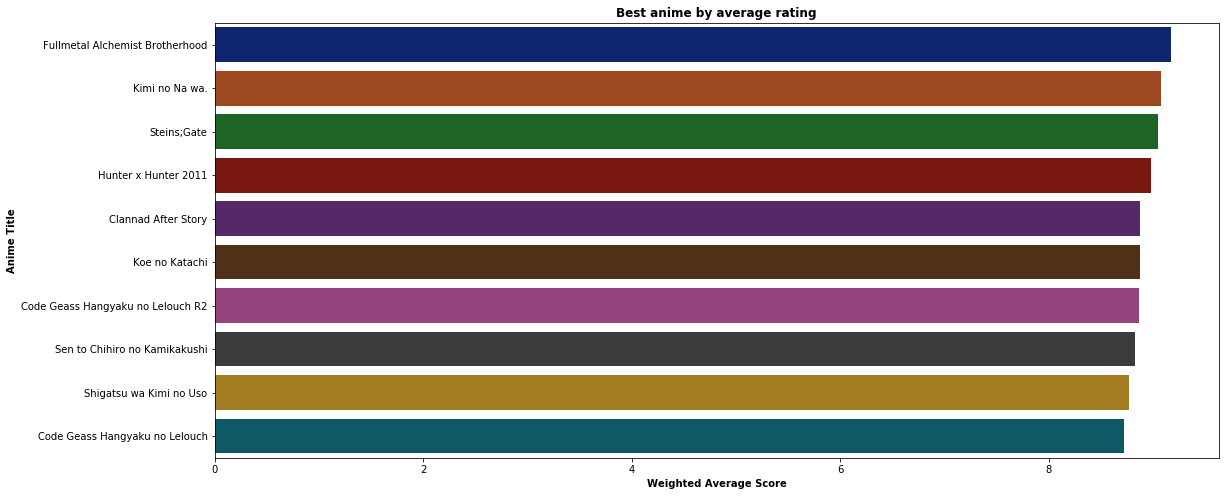

In [22]:
#plotting the top 10 anime according to weighted average
plt.figure(figsize=(18,8))

ax = sns.barplot(x = wavg['weighted_avg'].head(10), y = wavg['title'].head(10), data =wavg, palette='dark')

plt.title('Best anime by average rating', weight = 'bold')
plt.xlabel('Weighted Average Score', weight = 'bold')
plt.ylabel('Anime Title', weight = 'bold')

#plt.savefig('best_anime using weighted avg.png')

### Recommending according to the anime with the largest members

In [23]:
#sorting data according to their popularity
anime_members = anime_data.sort_values('members',ascending = False)
anime_members.head(20)

,title,genres,rating,scored_by,members,weighted_avg
1177,Death Note,"Mystery,Police,Psychological,Supernatural,Thri...",8.67,1006242,1451708,8.628310
4043,Shingeki no Kyojin,"Action,Military,Mystery,SuperPower,Drama,Fanta...",8.49,936784,1340641,8.449950
3710,Sword Art Online,"Action,Adventure,Fantasy,Game,Romance",7.64,913806,1297309,7.621475
2688,Fullmetal Alchemist Brotherhood,"Action,Military,Adventure,Comedy,Drama,Magic,F...",9.25,730784,1194518,9.174036
5016,One Punch Man,"Action,SciFi,Comedy,Parody,SuperPower,Supernat...",8.73,687965,1015163,8.667603
4530,Tokyo Ghoul,"Action,Mystery,Horror,Psychological,Supernatur...",8.01,656039,1008192,7.970957
2943,Angel Beats,"Action,Comedy,Drama,School,Supernatural",8.31,640177,1007952,8.258814
3313,Steins;Gate,"Thriller,SciFi",9.14,561405,1005781,9.046752
1209,Code Geass Hangyaku no Lelouch,"Action,Military,SciFi,SuperPower,Drama,Mecha,S...",8.79,625466,983674,8.719313
10,Naruto,"Action,Adventure,Comedy,SuperPower,MartialArts...",7.88,645672,975394,7.845171


Text(0, 0.5, 'Anime Title')

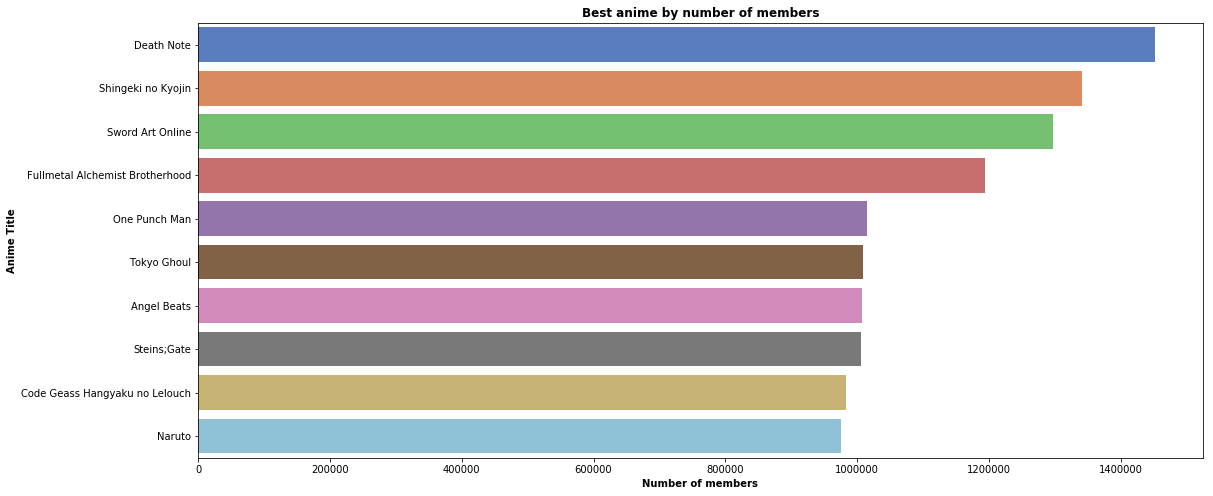

In [24]:
#plotting the top 10 anime according to their members
plt.figure(figsize=(18,8))

ax = sns.barplot(x = anime_members['members'].head(10), y = anime_members['title'].head(10), data = anime_members, palette='muted')

plt.title('Best anime by number of members', weight = 'bold')
plt.xlabel('Number of members', weight = 'bold')
plt.ylabel('Anime Title', weight = 'bold')

#plt.savefig('best_anime using members.png')

# Recommending Anime according to the weighted ratings and members 

In [25]:
#recommending movies based on weighted average and popularity
#normalizing the weighted average and popularity column

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(anime_data[['weighted_avg','members']])
data_norm = pd.DataFrame(data_scaled, columns = ['weighted_avg','members'])
data_norm.head()

C:\Users\JADESOLA\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,weighted_avg,members
0,0.892790,0.484928
1,0.771082,0.123318
2,0.774489,0.256225
3,0.554560,0.050932
4,0.508319,0.007063


In [26]:
#creating a score value that splits scaled weighted_avg and popularity in half
anime_data[['norm_weighted_avg','norm_members']] = data_norm
anime_data['score'] = anime_data['norm_weighted_avg']*0.5 + anime_data['norm_members']*0.5
data_scored = anime_data.sort_values(['score'], ascending=False)
data_scored.head()

,title,genres,rating,scored_by,members,weighted_avg,norm_weighted_avg,norm_members,score
1177,Death Note,"Mystery,Police,Psychological,Supernatural,Thri...",8.67,1006242,1451708,8.628310,0.879009,1.000000,0.939504
2688,Fullmetal Alchemist Brotherhood,"Action,Military,Adventure,Comedy,Drama,Magic,F...",9.25,730784,1194518,9.174036,1.000000,0.822714,0.911357
4043,Shingeki no Kyojin,"Action,Military,Mystery,SuperPower,Drama,Fanta...",8.49,936784,1340641,8.449950,0.839465,0.923439,0.881452
3313,Steins;Gate,"Thriller,SciFi",9.14,561405,1005781,9.046752,0.971780,0.692614,0.832197
5016,One Punch Man,"Action,SciFi,Comedy,Parody,SuperPower,Supernat...",8.73,687965,1015163,8.667603,0.887720,0.699081,0.793401


In [27]:
#showing the normalized features and the new score  feature
data_scored[['title','norm_weighted_avg','norm_members','score']].head()

,title,norm_weighted_avg,norm_members,score
1177,Death Note,0.879009,1.000000,0.939504
2688,Fullmetal Alchemist Brotherhood,1.000000,0.822714,0.911357
4043,Shingeki no Kyojin,0.839465,0.923439,0.881452
3313,Steins;Gate,0.971780,0.692614,0.832197
5016,One Punch Man,0.887720,0.699081,0.793401


Text(0, 0.5, 'Movie Title')

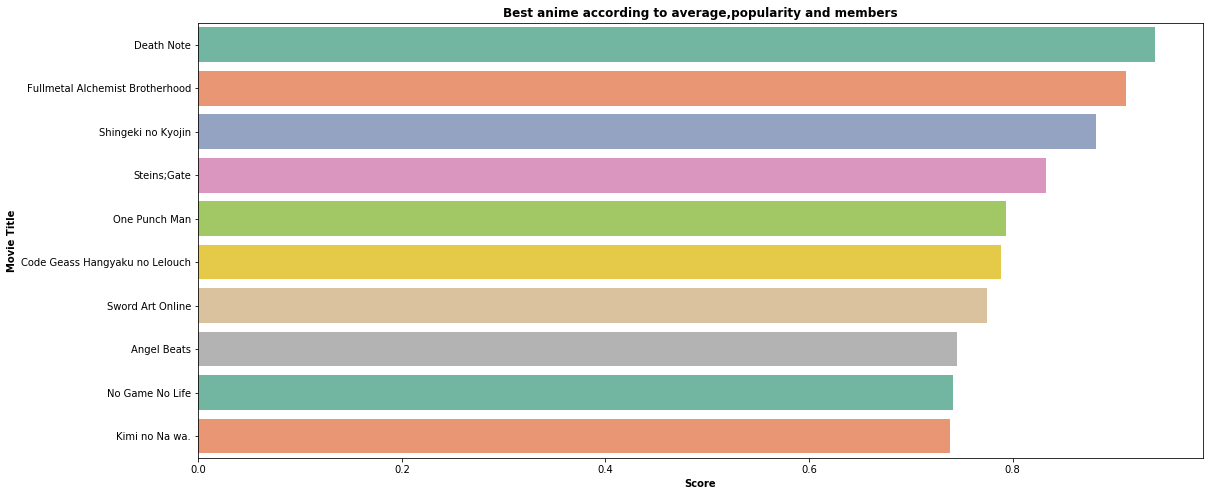

In [28]:
#plotting the top movies according to an even split between weighted avg and popularity

plt.figure(figsize=(18,8))

ax = sns.barplot(x = data_scored['score'].head(10), y = data_scored['title'].head(10), data = data_scored, palette='Set2')


plt.title('Best anime according to average,popularity and members', weight = 'bold')
plt.xlabel('Score', weight = 'bold')
plt.ylabel('Movie Title', weight = 'bold')

#plt.savefig('scored.png')

## Geting the best anime based on genres

In [29]:
data_scored.head()

,title,genres,rating,scored_by,members,weighted_avg,norm_weighted_avg,norm_members,score
1177,Death Note,"Mystery,Police,Psychological,Supernatural,Thri...",8.67,1006242,1451708,8.628310,0.879009,1.000000,0.939504
2688,Fullmetal Alchemist Brotherhood,"Action,Military,Adventure,Comedy,Drama,Magic,F...",9.25,730784,1194518,9.174036,1.000000,0.822714,0.911357
4043,Shingeki no Kyojin,"Action,Military,Mystery,SuperPower,Drama,Fanta...",8.49,936784,1340641,8.449950,0.839465,0.923439,0.881452
3313,Steins;Gate,"Thriller,SciFi",9.14,561405,1005781,9.046752,0.971780,0.692614,0.832197
5016,One Punch Man,"Action,SciFi,Comedy,Parody,SuperPower,Supernat...",8.73,687965,1015163,8.667603,0.887720,0.699081,0.793401


In [30]:
#resetting the index to match accordingly
data_scored = data_scored.drop_duplicates()
data_scored= data_scored.reset_index()
data_scored = data_scored.drop(columns='index')
data_scored.head()

,title,genres,rating,scored_by,members,weighted_avg,norm_weighted_avg,norm_members,score
0,Death Note,"Mystery,Police,Psychological,Supernatural,Thri...",8.67,1006242,1451708,8.628310,0.879009,1.000000,0.939504
1,Fullmetal Alchemist Brotherhood,"Action,Military,Adventure,Comedy,Drama,Magic,F...",9.25,730784,1194518,9.174036,1.000000,0.822714,0.911357
2,Shingeki no Kyojin,"Action,Military,Mystery,SuperPower,Drama,Fanta...",8.49,936784,1340641,8.449950,0.839465,0.923439,0.881452
3,Steins;Gate,"Thriller,SciFi",9.14,561405,1005781,9.046752,0.971780,0.692614,0.832197
4,One Punch Man,"Action,SciFi,Comedy,Parody,SuperPower,Supernat...",8.73,687965,1015163,8.667603,0.887720,0.699081,0.793401


In [31]:
#function to convert title,genre column to lower case
def lower(x):
    return x.lower()

In [32]:
data_scored['title'] = data_scored['title'].apply(lower)
data_scored['genres'] = data_scored['genres'].apply(lower)
data_scored.head()

,title,genres,rating,scored_by,members,weighted_avg,norm_weighted_avg,norm_members,score
0,death note,"mystery,police,psychological,supernatural,thri...",8.67,1006242,1451708,8.628310,0.879009,1.000000,0.939504
1,fullmetal alchemist brotherhood,"action,military,adventure,comedy,drama,magic,f...",9.25,730784,1194518,9.174036,1.000000,0.822714,0.911357
2,shingeki no kyojin,"action,military,mystery,superpower,drama,fanta...",8.49,936784,1340641,8.449950,0.839465,0.923439,0.881452
3,steins;gate,"thriller,scifi",9.14,561405,1005781,9.046752,0.971780,0.692614,0.832197
4,one punch man,"action,scifi,comedy,parody,superpower,supernat...",8.73,687965,1015163,8.667603,0.887720,0.699081,0.793401


In [33]:
data_scored.shape

(6368, 9)

In [34]:
#splitting the genre column into lists
def split_columns(x):
      return x.split(',')

In [35]:
data_scored['genres'] = data_scored['genres'].apply(split_columns)

In [36]:
data_scored.head()

,title,genres,rating,scored_by,members,weighted_avg,norm_weighted_avg,norm_members,score
0,death note,"[mystery, police, psychological, supernatural,...",8.67,1006242,1451708,8.628310,0.879009,1.000000,0.939504
1,fullmetal alchemist brotherhood,"[action, military, adventure, comedy, drama, m...",9.25,730784,1194518,9.174036,1.000000,0.822714,0.911357
2,shingeki no kyojin,"[action, military, mystery, superpower, drama,...",8.49,936784,1340641,8.449950,0.839465,0.923439,0.881452
3,steins;gate,"[thriller, scifi]",9.14,561405,1005781,9.046752,0.971780,0.692614,0.832197
4,one punch man,"[action, scifi, comedy, parody, superpower, su...",8.73,687965,1015163,8.667603,0.887720,0.699081,0.793401


In [37]:
data_scored.dtypes

title                 object
genres                object
rating               float64
scored_by              int64
members                int64
weighted_avg         float64
norm_weighted_avg    float64
norm_members         float64
score                float64
dtype: object

In [45]:
#mapping each title to its genre
anime_map = dict(zip(range(data_scored.shape[0]),data_scored['genres']))

In [46]:
anime_map

{0: ['mystery',
  'police',
  'psychological',
  'supernatural',
  'thriller',
  'shounen'],
 1: ['action',
  'military',
  'adventure',
  'comedy',
  'drama',
  'magic',
  'fantasy',
  'shounen'],
 2: ['action',
  'military',
  'mystery',
  'superpower',
  'drama',
  'fantasy',
  'shounen'],
 3: ['thriller', 'scifi'],
 4: ['action',
  'scifi',
  'comedy',
  'parody',
  'superpower',
  'supernatural',
  'seinen'],
 5: ['action', 'military', 'scifi', 'superpower', 'drama', 'mecha', 'school'],
 6: ['action', 'adventure', 'fantasy', 'game', 'romance'],
 7: ['action', 'comedy', 'drama', 'school', 'supernatural'],
 8: ['game', 'adventure', 'comedy', 'supernatural', 'ecchi', 'fantasy'],
 9: ['supernatural', 'drama', 'romance', 'school'],
 10: ['action', 'military', 'scifi', 'superpower', 'drama', 'mecha'],
 11: ['action', 'adventure', 'superpower', 'shounen'],
 12: ['sliceoflife', 'comedy', 'romance', 'school'],
 13: ['action',
  'mystery',
  'horror',
  'psychological',
  'supernatural',
  

In [52]:
#function to get recommendation based on genre
def get_recommendations(genre):
    
    #checking if the genre is in the map inorder to pick the top ones
    index = []
    for i in range(data_scored.shape[0]):
        if genre in anime_map[i]:
            index.append(i)
        
    # Scores of the 10 most similar movies
    anime_index = index[0:10]

    # Movie indices
   # movie_indices = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    return data_scored['title'].iloc[anime_index]

In [54]:
get_recommendations('police')

0                                             death note
89                                               monster
121                                     koukaku kidoutai
155                 koukaku kidoutai stand alone complex
244         koukaku kidoutai stand alone complex 2nd gig
280                                         psychopass 2
299                                   detective conan tv
491                                     psychopass movie
592    koukaku kidoutai stand alone complex  solid st...
599                                   death note rewrite
Name: title, dtype: object